Aluno: Arthur Pinheiro Nascimento

DRE: 121122575

##Metodologia
A decomposição em valores singulares foi originalmente desenvolvida por geômetras estudando geometria diferencial. Eles desejavam determinar se uma forma bilinear real pode ser tornada igual a uma outra por transformações ortogonais independentes dos dois espaços no qual ela age. Eugenio Beltrami e Camille Jordan descobriram independentemente, em 1873 e 1874, respectivamente, que os valores singulares das formas bilineares, representados por uma matriz, formam um conjunto completo de invariantes para formas bilineares sob substituições ortogonais.

SVD é uma decomposição matricial que divide uma matriz qualquer em 3 outras, $U, S, V,$ ($M = USV$) sendo que:

*   $U = \overline{V^t}$
*   $S$ é uma matriz diagonal contendo os autovalores de $M$
*   $U$ e $V$ são bases ortonormais e contém, respectivamente os autovalores de $MM^*$ e $M^*M$




##Objetivo


*   Utilizar SVD para reduzir a dimensionalidade das matrizes RGB de uma imagem
*   Guardar uma imagem de forma mais eficiente, ocupando menos espaço



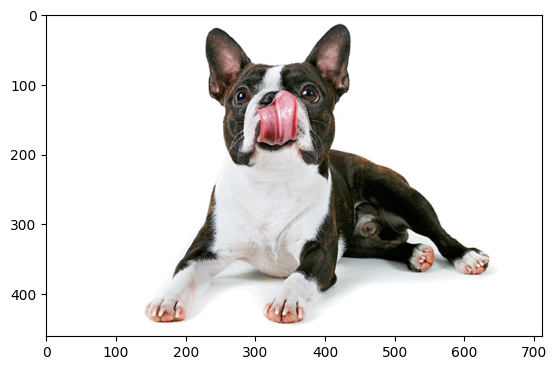

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

#abrindo imagem e convertendo para rgb
img = Image.open("cao.png").convert("RGB")

#pegando os canais rgb e transformando em np.array
r, g, b = map(lambda x: np.array(x).astype(np.uint64), img.split())

#fazendo o SVD dos canais de cor
Ur, Sr, Vr = np.linalg.svd(r, full_matrices=False)
Ug, Sg, Vg = np.linalg.svd(g, full_matrices=False)
Ub, Sb, Vb = np.linalg.svd(b, full_matrices=False)

#plotando imagem sem alterações
plt.imshow(img)

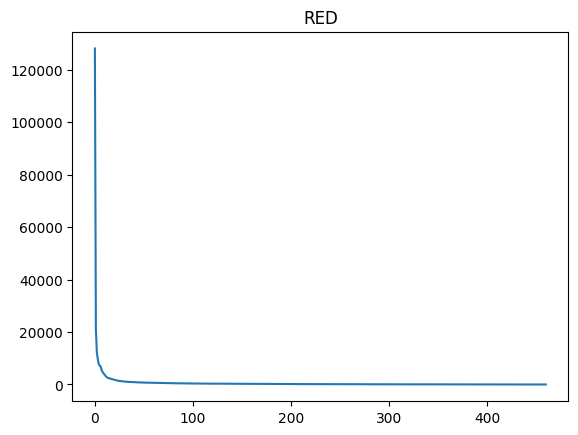

In [ ]:
#plotando imagem para escolha do k para a cor vermelho
plt.plot(Sr)
plt.title("RED")
plt.show()
kr = 50

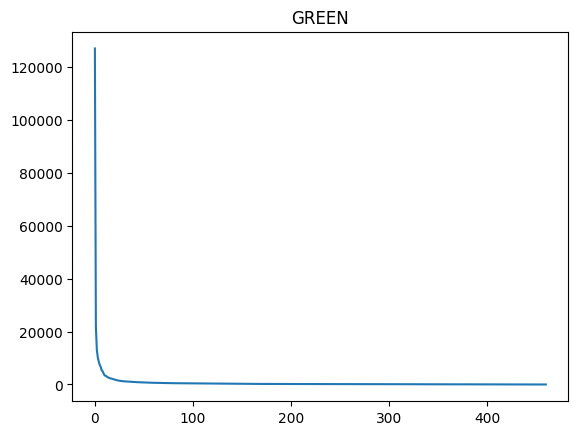

In [ ]:
#plotando imagem para escolha do k para a cor verde
plt.plot(Sg)
plt.title("GREEN")
plt.show()
kg = 50

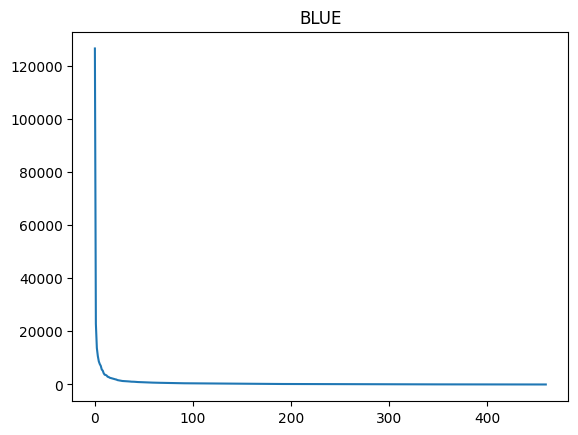

In [ ]:
#plotando imagem para escolha do k para a cor azul
plt.plot(Sb)
plt.title("BLUE")
plt.show()
kb = 50

##Escolha do K
Utilizando o método do cotovelo, apesar do gráfico indicar que um valor de k=50 seria suficiente, a imagem não fica muito boa quando faço isso. Fiquei satisfeito com k = 300.

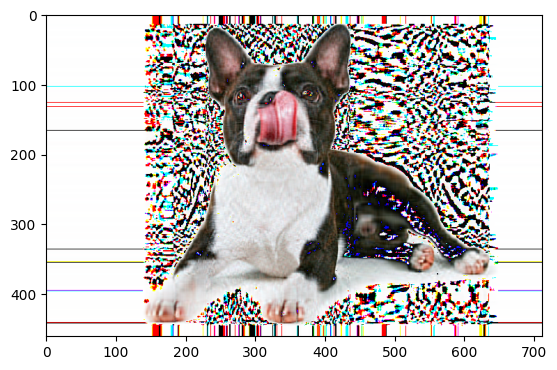

In [ ]:
#reduzindo a dimensão das matrizes que vão compor o RGB
R = Ur[:, :kr] @ np.diag(Sr[:kr]) @ Vr[:kr, :]
G = Ug[:, :kg] @ np.diag(Sg[:kg]) @ Vg[:kg, :]
B = Ub[:, :kb] @ np.diag(Sb[:kb]) @ Vb[:kb, :]

#reconstruindo a matriz RGB
rgbArray = np.zeros((461, 712, 3), 'uint8')
rgbArray[..., 0] = R
rgbArray[..., 1] = G
rgbArray[..., 2] = B

#mostrando a nova imagem
nova_img = Image.fromarray(rgbArray, 'RGB')
plt.imshow(nova_img)

---
#Testando com outra imagem





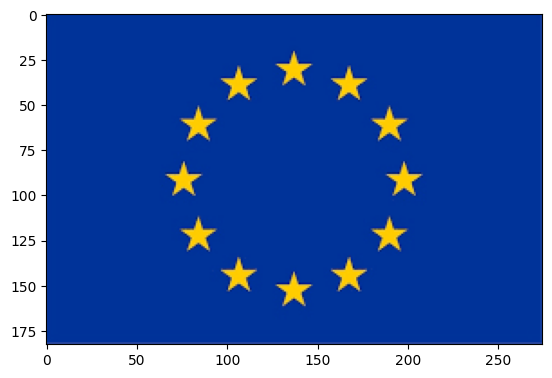

In [ ]:
#abrindo imagem e convertendo para rgb
img = Image.open("UE.png").convert("RGB")

#pegando os canais rgb e transformando em np.array
r, g, b = map(lambda x: np.array(x).astype(np.uint64), img.split())

#fazendo o SVD dos canais de cor
Ur, Sr, Vr = np.linalg.svd(r, full_matrices=False)
Ug, Sg, Vg = np.linalg.svd(g, full_matrices=False)
Ub, Sb, Vb = np.linalg.svd(b, full_matrices=False)

#plotando aimagem sem alterações
plt.imshow(img)

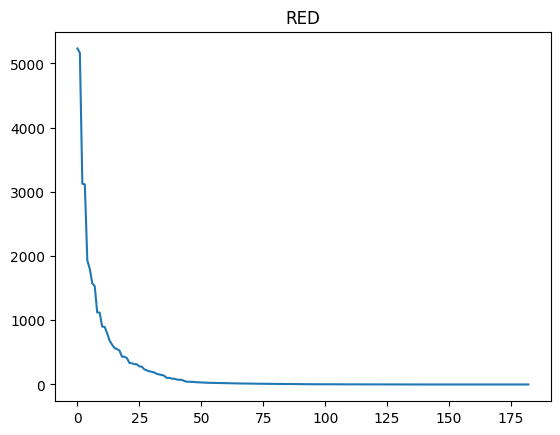

In [ ]:
#plotando imagem para escolha do k para a cor vermelho
plt.plot(Sr)
plt.title("RED")
plt.show()
kr2 = 35

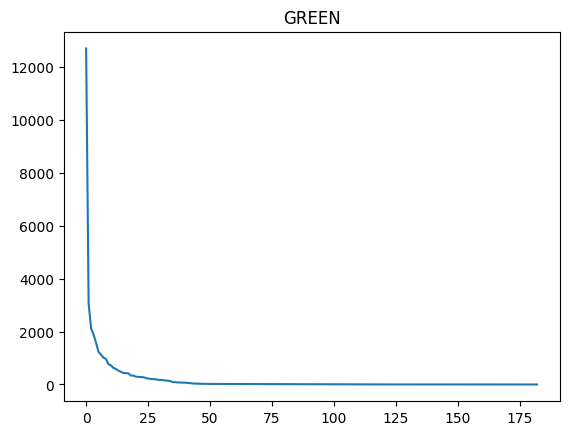

In [ ]:
#plotando imagem para escolha do k para a cor verde
plt.plot(Sg)
plt.title("GREEN")
plt.show()
kg2 = 25

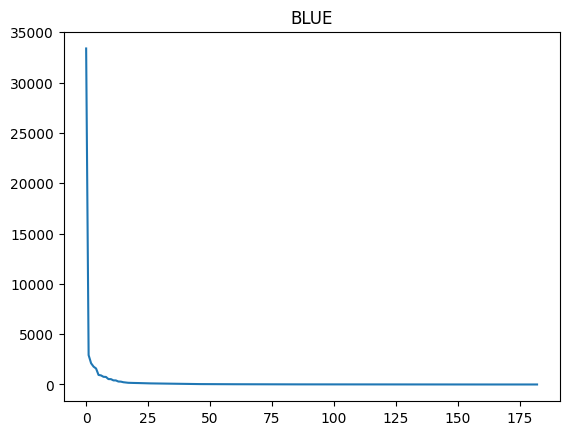

In [ ]:
#plotando imagem para escolha do k para a cor azul
plt.plot(Sb)
plt.title("BLUE")
plt.show()
kb2 = 10

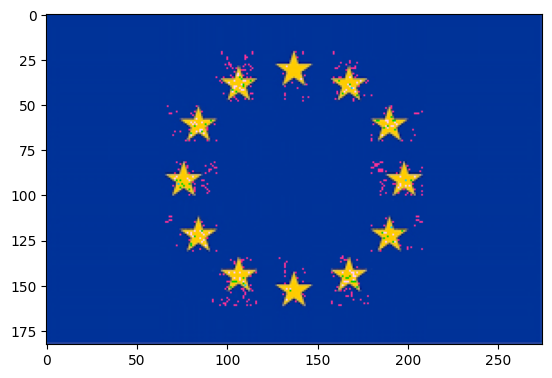

In [ ]:
#reduzindo a dimensão das matrizes que vão compor o RGB
R = Ur[:, :kr] @ np.diag(Sr[:kr]) @ Vr[:kr, :]
G = Ug[:, :kg] @ np.diag(Sg[:kg]) @ Vg[:kg, :]
B = Ub[:, :kb] @ np.diag(Sb[:kb]) @ Vb[:kb, :]

#reconstruindo a matriz RGB
rgbArray = np.zeros((183, 275, 3), 'uint8')
rgbArray[..., 0] = R
rgbArray[..., 1] = G
rgbArray[..., 2] = B

#mostrando a nova imagem
nova_img = Image.fromarray(rgbArray, 'RGB')
plt.imshow(nova_img)

##Conclusão
SVD é uma técnica com diversas aplicações, uma delas, a demonstrada aqui, é a de poder guardar imagens com menos espaço na memória com o lado negativo de se perder informações da imagem original,podendo ela parecer distorcida.

##Fontes


*   https://pt.wikipedia.org/wiki/Decomposição_em_valores_singulares#Relação_com_a_decomposição_em_autovalores_(espectral)

